In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Oct 22 07:16:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
## Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=DJU1Try4O1ZSw16HwneK9AocITp9ra&prompt=consent&access_type=offline&code_challenge=OeELLcYoquM93a8XSZsLXhbwB-b5OAWQsgtPNcx3liI&code_challenge_method=S256

Enter verification code: 4/1AX4XfWgF5UIYQrqVnphLs5Agn_057nBm0xsWpiB0pwkiOYm1Pz_wJPDidVc


In [5]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [6]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [7]:
# os.chdir('./drive')
import os
os.listdir()

['.config', 'gdrive', 'adc.json', 'drive', 'sample_data']

In [8]:
# suppose you make a directory called "try_colab" under your google drive
# you can change this path to the directory you want to work at 
path = './drive/STATSM231A/HW2' 
os.chdir(path)

os.listdir('./')

['PyTorch_CIFAR10', 'GRU_Prediction', 'hw2_ResNet.ipynb']

In [9]:
# Clone the code 
# code begin with "!" are command line input instead of python code
# ! git clone https://github.com/huyvnphan/PyTorch_CIFAR10.git

In [10]:
# Get into the folder
os.chdir('PyTorch_CIFAR10')
os.listdir('./')

['.git',
 '.gitignore',
 'LICENSE',
 'README.md',
 'cifar10_models',
 'data.py',
 'module.py',
 'schduler.py',
 'train.py',
 '__pycache__',
 'state_dicts.zip',
 'data']

In [11]:
# install package pytorch lightening
! pip install pytorch-lightning
  

     |████████████████████████████████| 925 kB 8.6 MB/s 
     |████████████████████████████████| 282 kB 74.4 MB/s 
     |████████████████████████████████| 829 kB 52.9 MB/s 
     |████████████████████████████████| 125 kB 69.6 MB/s 
     |████████████████████████████████| 596 kB 54.5 MB/s 
     |████████████████████████████████| 1.3 MB 54.4 MB/s 
     |████████████████████████████████| 160 kB 73.0 MB/s 
     |████████████████████████████████| 271 kB 76.5 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=0597504149b14e2466e21c666c6f46911db5f6fbd4bc3f86e0510f966893c715
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0

In [12]:
# Follow the instruction in the github, download pretrained weight
# It may take some time for running it, if you meet error here, 
# you may re-run the code for many times until success or check the next block
# ! python train.py --download_weights 1

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [14]:
from cifar10_models import resnet
resnet18 = resnet.resnet18(pretrained=True)
resnet34 = resnet.resnet34(pretrained=True)
resnet50 = resnet.resnet50(pretrained=True)

In [15]:
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
meanVec = [0.4914, 0.4822, 0.4465]
stdVec = [0.2471, 0.2435, 0.2616]
normalize = transforms.Normalize(mean = meanVec,
                                 std = stdVec)

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean = meanVec, std = stdVec)])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [18]:
# sample_images = [trainset.data[np.asarray(trainset.targets) == label][0] for label in range(10)]
# # show images
# fig, axes = plt.subplots(2, 5, figsize=(12, 6))
# i = 0
# for row in axes:
    
#     for axis in row:
        
#         axis.set_xticks([])
#         axis.set_yticks([])
#         axis.set_xlabel(classes[i], fontsize=15)
#         axis.imshow(sample_images[i])
#         i += 1

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)
resnet18.to(device)

num_params18 = sum(p.numel() for p in resnet18.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params18)

Device: cuda:0
Number of trainable parameters: 11173962


In [20]:
pred_vec = []
correctResnet18 = 0
resnet18.eval()
with torch.no_grad():
    for data in testloader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        outputs = resnet18(batch)
        _, predicted = torch.max(outputs, 1)
        correctResnet18 += (predicted == labels).sum().item()
        pred_vec.append(predicted)
    pred_vec = torch.cat(pred_vec)

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correctResnet18 / len(testset)))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Accuracy on the 10000 test images: 93.07 %


In [21]:
resnet34.to(device)

num_params34 = sum(p.numel() for p in resnet34.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params34)

Number of trainable parameters: 21282122


In [22]:

pred_vec = []
correctResnet34 = 0
resnet34.eval()
with torch.no_grad():
    for data in testloader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        outputs = resnet34(batch)
        _, predicted = torch.max(outputs, 1)
        correctResnet34 += (predicted == labels).sum().item()
        pred_vec.append(predicted)
    pred_vec = torch.cat(pred_vec)

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correctResnet34 / len(testset)))

Accuracy on the 10000 test images: 93.33 %


In [23]:
resnet50.to(device)

num_params50 = sum(p.numel() for p in resnet50.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params50)

Number of trainable parameters: 23520842


In [24]:
pred_vec = []
correctResnet50 = 0
resnet50.eval()
with torch.no_grad():
    for data in testloader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        outputs = resnet50(batch)
        _, predicted = torch.max(outputs, 1)
        correctResnet50 += (predicted == labels).sum().item()
        pred_vec.append(predicted)
    pred_vec = torch.cat(pred_vec)

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correctResnet50 / len(testset)))

Accuracy on the 10000 test images: 93.65 %


No handles with labels found to put in legend.


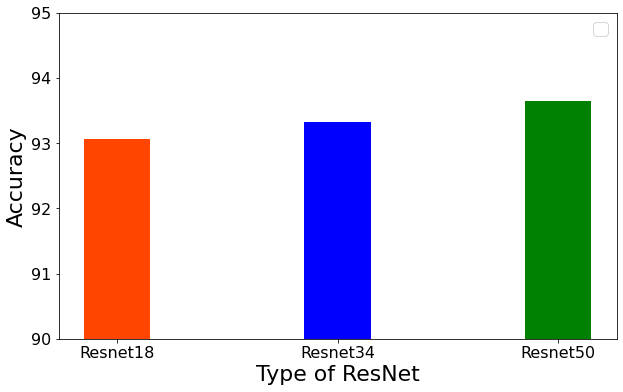

In [25]:
labels = ['Resnet18', 'Resnet34', 'Resnet50']

accuracyVec = 100 * np.array([correctResnet18, correctResnet34, correctResnet50])/len(testset)

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x, accuracyVec, width, color = ['orangered', 'blue', 'green'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Accuracy', fontsize = 22)
ax.set_ylim(bottom = 90, top = 95)
ax.set_xlabel('Type of ResNet', fontsize = 22)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend(fontsize = 18);